# Exploration de la base de données vélib fournie par Depersin et Schreuder

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from json import loads #pour lire des dicos dans des strings

In [2]:
path = "velib_358.csv"
velib = pd.read_csv(path, sep = ';')

FileNotFoundError: [Errno 2] File velib_358.csv does not exist: 'velib_358.csv'

In [ ]:
def to_dictionary(jour):
    """transformer le format chelou en dico"""

    dia = '{' + jour[2:-2].replace('{','').replace('}','').replace("'",'"') + '}'
    try :
        dictionary = loads(dia)
    except:
        dictionary = {'mechanical': 0, 'ebike': 0}
    
    return dictionary

col = velib.columns

In [ ]:
velib = velib.set_index("station_id")

In [ ]:
velib.head()

# Pour connaître le nom du projet et son fuseau horaire : table `system_formation` avec :
- language : langue utilisée dans l’ensemble des fichiers
- name : nom du système
- system_id : identifiant unique du système
- timezone : zone horaire associée au système
- url :adresse associée au système
- lastUpdatedOther : date de dernière mis-à jour des informations de la ville
- ttl : « time to live » , durée de vie de l’information au-delà de laquelle elle doit être considérée comme obsolète


In [11]:
import urllib.request
import json
from pandas.io.json import json_normalize

request= urllib.request.Request('https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/system_information.json')
response = urllib.request.urlopen(request)
station_info = response.read()
data = json.loads(station_info)
df_station_info = json_normalize(data['data'])
df_station_info.head()

,system_id,name,url,timezone,language
0,Paris,Paris,,Europe/Paris,en


# Pour connaître les flux existants : la table `gbfs`



In [12]:
request= urllib.request.Request('https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/gbfs.json')
response = urllib.request.urlopen(request)
flux_existants = response.read()
data = json.loads(flux_existants)
df_flux = json_normalize(data['data']['en']['feeds'])
df_flux

,name,url
0,gbfs,https://velib-metropole-opendata.smoove.pro/op...
1,system_information,https://velib-metropole-opendata.smoove.pro/op...
2,station_information,https://velib-metropole-opendata.smoove.pro/op...
3,station_status,https://velib-metropole-opendata.smoove.pro/op...


# Information sur les stations avec la table `station_information` : 
- capacity : nombre de bornettes dans la station
- lat : latitude de la station (au format WGS84)
- lon : longitude de la station (au format WGS84)
- name : nom de la station
- station_id : identifiant unique associé à la station. Ce numéro identifie la station au sein du service Vélib’ Métropole

In [13]:
request= urllib.request.Request('https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_information.json')
response = urllib.request.urlopen(request)
station_info = response.read()
data = json.loads(station_info)
df_station_info = json_normalize(data['data']['stations'])
df_station_info.head()

,station_id,name,lat,lon,capacity,stationCode,rental_methods
0,213688169,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,16107,NaN
1,99950133,André Mazet - Saint-André des Arts,48.853756,2.339096,55,6015,[CREDITCARD]
2,516709288,Charonne - Robert et Sonia Delauney,48.855908,2.392571,20,11104,NaN
3,36255,Toudouze - Clauzel,48.879296,2.337360,21,9020,[CREDITCARD]
4,37815204,Mairie du 12ème,48.840855,2.387555,30,12109,NaN


# Nombre de vélos et de bornettes disponibles par station avec la table `stations_status` avec :
- station_id: numéro unique d’identification de la station. Ce numéro identifie la station au sein du service Vélib’ Métropole
- is_installed: variable binaire indiquant si la station est. La station a déjà été déployée (1) ou est encore en cours de déploiement (0) 
- is_renting: variable binaire indiquant si la station peut louer des vélos (is_renting=1 si le statut de la station est Operative)
- is_returning: variable binaire indiquant si la station peut recevoir des vélos (is_renting=1 si le statut de la station est Operative)
- last_reported : date de la dernière mise-à-jour 
- numBikesAvailable: nombre de vélos disponibles
- numDocksAvailable: nombre de bornettes disponibles
- num_bikes_available: nombre de vélos disponibles
- num_bikes_available_types: nombre de vélos disponibles avec distinctions entre Vélib’ mécanique et électrique

In [14]:
request= urllib.request.Request('https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_status.json')
response = urllib.request.urlopen(request)
velib_stations = response.read()
data = json.loads(velib_stations)
df = json_normalize(data['data']['stations'])
df


,stationCode,station_id,num_bikes_available,numBikesAvailable,num_bikes_available_types,num_docks_available,numDocksAvailable,is_installed,is_returning,is_renting,last_reported
0,16107,213688169,3,3,"[{'mechanical': 2}, {'ebike': 1}]",32,32,1,1,1,1605774892
1,6015,99950133,9,9,"[{'mechanical': 6}, {'ebike': 3}]",46,46,1,1,1,1605774744
2,11104,516709288,2,2,"[{'mechanical': 1}, {'ebike': 1}]",18,18,1,1,1,1605774863
3,9020,36255,1,1,"[{'mechanical': 0}, {'ebike': 1}]",19,19,1,1,1,1605774709
4,12109,37815204,12,12,"[{'mechanical': 10}, {'ebike': 2}]",17,17,1,1,1,1605774943
...,...,...,...,...,...,...,...,...,...,...,...
1392,12039,27415004,29,29,"[{'mechanical': 27}, {'ebike': 2}]",5,5,1,1,1,1605774915
1393,13037,27415128,4,4,"[{'mechanical': 1}, {'ebike': 3}]",16,16,1,1,1,1605774943
1394,12017,27414937,4,4,"[{'mechanical': 3}, {'ebike': 1}]",31,31,1,1,1,1605774917
1395,13013,66507230,20,20,"[{'mechanical': 14}, {'ebike': 6}]",1,1,1,1,1,1605774867


Dans ce dataframe `df`, on peut rajouter 2 colonnes : mechanical & ebike au lieu de `num_bikes_available_types`

# Affichage des stations sur une carte de la France

In [16]:
# Création d'un géodataframe avec les données de géolocalisation des stations vélib
gdf = gpd.GeoDataFrame(
    df_station_info[['name' , 'capacity']], geometry=gpd.points_from_xy(df_station_info.lon, df_station_info.lat))
gdf

,name,capacity,geometry
0,Benjamin Godard - Victor Hugo,35,POINT (2.27572 48.86598)
1,André Mazet - Saint-André des Arts,55,POINT (2.33910 48.85376)
2,Charonne - Robert et Sonia Delauney,20,POINT (2.39257 48.85591)
3,Toudouze - Clauzel,21,POINT (2.33736 48.87930)
4,Mairie du 12ème,30,POINT (2.38755 48.84086)
...,...,...,...
1392,Général Michel Bizot - Claude Decaen,38,POINT (2.40093 48.83481)
1393,Ivry - Baudricourt,20,POINT (2.36311 48.82470)
1394,Saint-Mandé - Docteur Arnold Netter,39,POINT (2.40495 48.84463)
1395,Saint-Marcel - Hôpital,21,POINT (2.36099 48.83950)


In [17]:
import requests
import tempfile
import zipfile

url = 'https://www.data.gouv.fr/fr/datasets/r/07b7c9a2-d1e2-4da6-9f20-01a7b72d4b12'
temporary_location = tempfile.gettempdir()

def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
    myfile = requests.get(url)
    open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
    with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref:
        zip_ref.extractall(dirname + '/' + destname)
        
download_unzip(url)
communes = gpd.read_file(temporary_location + "/borders/communes-20190101.json")

communes_borders = gpd.read_file(temporary_location + "/borders/communes-20190101.json")
communes_borders.crs

communes['dep'] = communes.insee.str[:2]

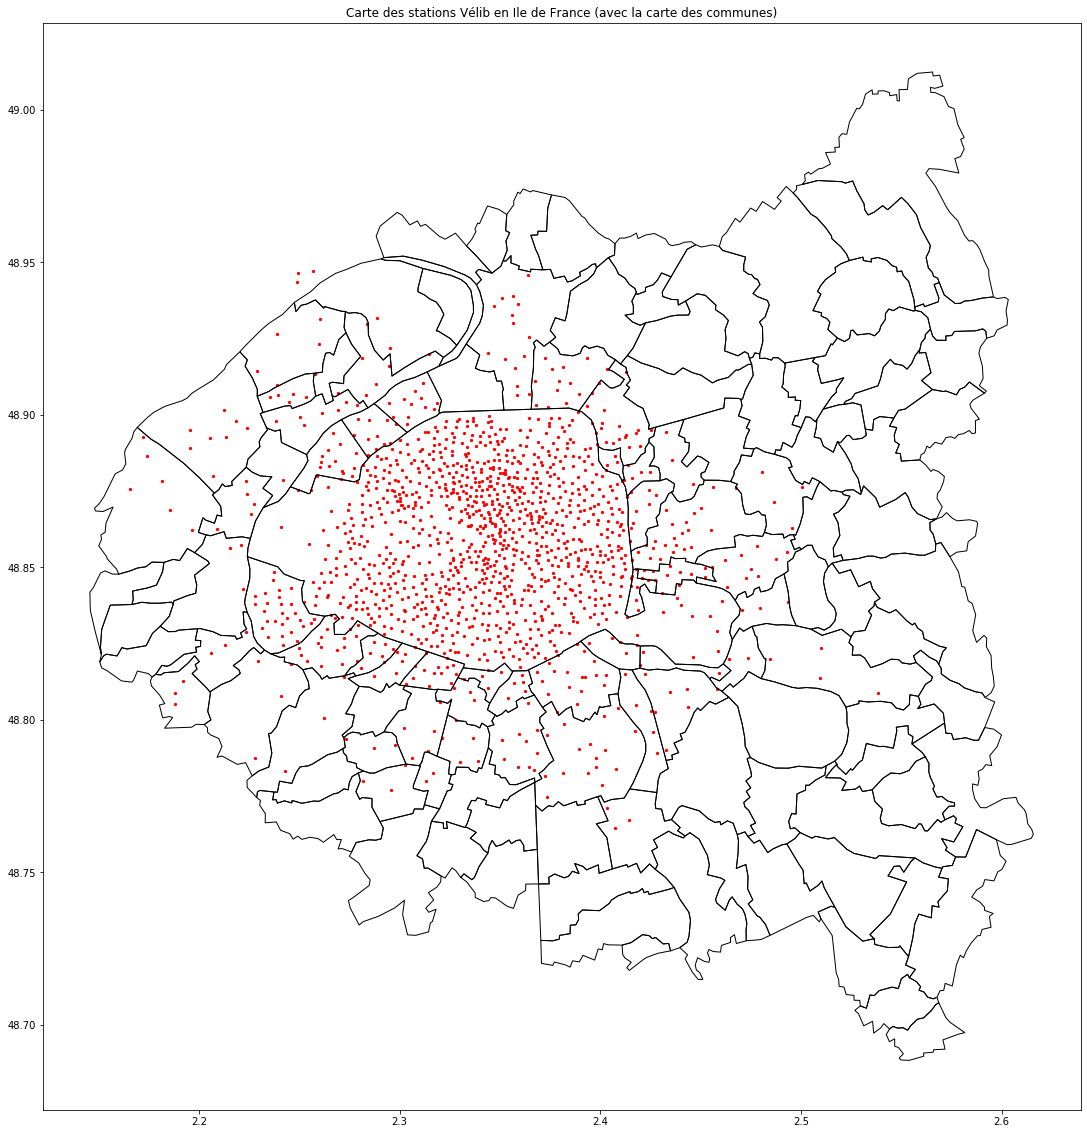

In [20]:
# Affichage de la carte de l'Ile de France avec ses départements
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.set_aspect('equal')
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
communes[communes['dep'].isin(['75','92','93','94'])].plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none", color = None)
ax.set_title("Carte des stations Vélib en Ile de France (avec la carte des communes)");